# Edit Distance Between Memory and Rules

### T14

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

for idx in range(10):
    plt.figure(figsize=(20, 10))
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
    plt.xlabel('Number of Reports')
    plt.ylabel('Edit Distance')
    plt.title(f'Changes in Edit Distance for the Number of Reports - {idx}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(40, 20))

for idx in range(10):

    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    plt.plot(data.index, data['cmem_t_edit_distance'], label=idx)
    
plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

plt.savefig('combined_plot.png')
plt.show()


In [ ]:
data_frames = []

for idx in range(10):
    file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_{idx}.csv"
    data = pd.read_csv(file_path)
    data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])
    data_frames.append(data['cmem_t_edit_distance'])

combined_data = pd.concat(data_frames, axis=1)
average_data = combined_data.mean(axis=1)

plt.figure(figsize=(15, 10))
plt.plot(average_data, label='Average Edit Distance', color='blue')

plt.xlabel('Number of Reports')
plt.ylabel('Edit Distance')
plt.title('Average Changes in Edit Distance for the Number of Reports')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('average_edit_distance_plot.png')
plt.show()

# Test Performance

In [ ]:
from src.metrics import *
import numpy as np
import pandas as pd

results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{idx}.csv")
    print(f"t14_test_{idx}")
    result = t14_performance_report(memory_df, f"cmem_t_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

In [ ]:
results = []
for idx in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{idx}.csv")
    print(f"n03_test_{idx}")
    result = n03_performance_report(memory_df, f"cmem_n_ans_str")
    results.append(result)
    print()

results = np.array(results)
ci_lower = np.percentile(results, 2.5, axis=0)
ci_upper = np.percentile(results, 97.5, axis=0)

print("Precision:", np.mean(results[:, 0]), "(CI:", ci_lower[0], ci_upper[0], ")")
print("Recall:", np.mean(results[:, 1]), "(CI:", ci_lower[1], ci_upper[1], ")")
print("F1:", np.mean(results[:, 2]), "(CI:", ci_lower[2], ci_upper[2], ")")

# significant drop in edit distance

In [ ]:
import matplotlib.pyplot as plt

file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]


plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')
for idx in significant_drops.index:
    plt.annotate(f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", (idx, data.loc[idx, 'cmem_t_edit_distance']),
                 textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.title('cmem_t_edit_distance over Reports Index')
plt.xlabel('Index')
plt.ylabel('cmem_t_edit_distance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

file_path = "/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
data = pd.read_csv(file_path).dropna(subset=['cmem_t_edit_distance'])

data['cmem_t_edit_distance'] = pd.to_numeric(data['cmem_t_edit_distance'])

data['percentage_change'] = data['cmem_t_edit_distance'].pct_change() * 100

significant_drops = data[data['percentage_change'] <= -50]

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['cmem_t_edit_distance'], linestyle='-')
plt.scatter(significant_drops.index, significant_drops['cmem_t_edit_distance'], marker='o', color='red', label='Significant Drop (>50%)')

texts = []
for idx in significant_drops.index:
    texts.append(plt.text(idx, data.loc[idx, 'cmem_t_edit_distance'], f"({idx},{data.loc[idx, 'cmem_t_edit_distance']})", color='red'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('cmem_t_edit_distance over Reports Index')
plt.xlabel('Index')
plt.ylabel('cmem_t_edit_distance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_0.csv"
memory_df = pd.read_csv(file_path)
significant_drops_df = memory_df.iloc[significant_drops.index]
significant_drops_df.to_csv('significant_drops.csv', index=False)
significant_drops_df

In [ ]:
memory_df['text'].apply(len).mean()

In [ ]:
significant_drops_df['text'].apply(len)

# Dynamic memory test (To decide the number of reports needed for memory)

### T14

In [ ]:
from src.metrics import *
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")
memory_df = memory_df.drop(['Unnamed: 0', 'patient_filename', 'text', 'type', 'n'], axis=1)

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_t_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_t_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = t14_performance_report(memory_df, f'cmem_t_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_dynamic_test_0.csv")

zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_zs_results.csv")
fs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_luad_fs_results.csv")
zscot_df = pd.read_csv("/secure/shared_data/rag_tnm_results/t14_results/mixtral_all_brca_zscot_results.csv")
                       
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_fs_df = fs_df[fs_df["patient_filename"].isin(memory_df['patient_filename'])]
filtered_zscot_df = zscot_df[zscot_df["patient_filename"].isin(memory_df['patient_filename'])]

zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
fs_precision, fs_recall, fs_f1 = t14_performance_report(filtered_fs_df, 'ans_str')
zscot_precision, zscot_recall, zscot_f1 = t14_performance_report(filtered_zscot_df, 'ans_str_0')

In [ ]:
zs_precision, zs_recall, zs_f1 = t14_performance_report(filtered_zs_df, 'ans_str')
zs_precision, zs_recall, zs_f1

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (t14_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (t14_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
bad_memory_idx = []
for i in range(len(memory_idx)):
    if precision_lst[i] < zs_precision and recall_lst[i] < zs_recall:
        bad_memory_idx.append(memory_idx[i])   

len(bad_memory_idx)

In [ ]:
for idx in bad_memory_idx:
    print(train_data.iloc[idx]["cmem_t_memory_str"])
    print("---------")
    

### n03

In [ ]:
from src.metrics import *
import numpy as np
import pandas as pd

memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/n03_dynamic_test_0.csv")

# x-axis
train_file_path =  f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_train_0.csv"
train_data = pd.read_csv(train_file_path)
memory_idx = []
for idx, row in train_data.iterrows():
    if row["cmem_n_is_updated"] == True:
        memory_idx.append(idx)

# Check for parsing error: OK
for i in memory_idx:
    if len(memory_df[memory_df[f"cmem_n_{i}reports_is_parsed"]==False]) > 0:
        print(f"parsing error at memory {i}")

# gather y-axis data
precision_lst = []
recall_lst = []
f1_lst = []
for i in memory_idx:
    precision, recall, f1 = n03_performance_report(memory_df, f'cmem_n_{i}reports_ans_str')
    precision_lst.append(precision)
    recall_lst.append(recall)
    f1_lst.append(f1)

In [ ]:
zs_df = pd.read_csv("/secure/shared_data/rag_tnm_results/n03_results/mixtral_all_brca_zs_results.csv")
filtered_zs_df = zs_df[zs_df["patient_filename"].isin(memory_df['patient_filename'])]
zs_precision, zs_recall, zs_f1 = n03_performance_report(filtered_zs_df, 'ans_str')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(memory_idx, precision_lst, label='Memory Precision', color='blue', marker='o')
plt.plot(memory_idx, recall_lst, label='Memory Recall', color='green', marker='o')
plt.plot(memory_idx, f1_lst, label='Memory F1 Score', color='red', marker='o')

plt.axhline(y=zs_precision, color='blue', linestyle='--', label='Zero-shot Precision')
plt.axhline(y=zs_recall, color='green', linestyle='--', label='Zero-shot Recall')
plt.axhline(y=zs_f1, color='red', linestyle='--', label='Zero-shot F1 Score')

for i in range(len(memory_idx)):
    if (precision_lst[i] < zs_precision) and (recall_lst[i] < zs_recall):
        plt.annotate(f'{memory_idx[i]}', 
                     (memory_idx[i], f1_lst[i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     fontsize=10, 
                     color='red')

plt.xlabel('# of Reports for Memory (n03_train_0.csv)')
plt.ylabel('Scores')
plt.title('Testing Results on 700 test Reports (n03_test_0.csv)')
plt.legend()
plt.grid(True)

plt.show()

# Edit Distance Between (current)Rules and (previous)Rules

/home/yl3427/miniconda3/envs/selfCorrection/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


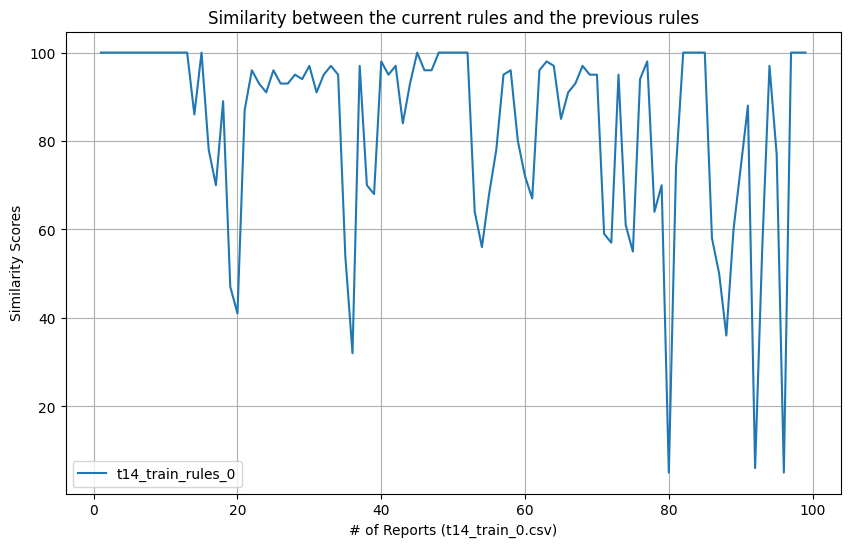

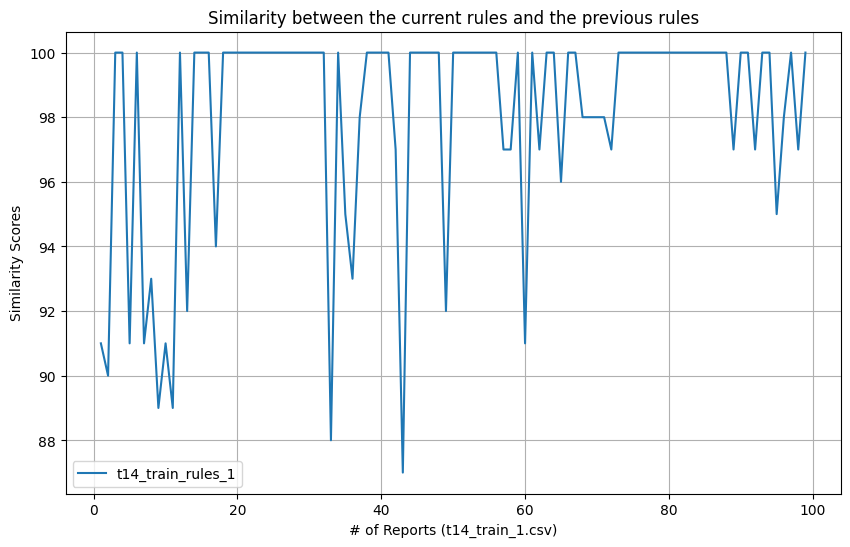

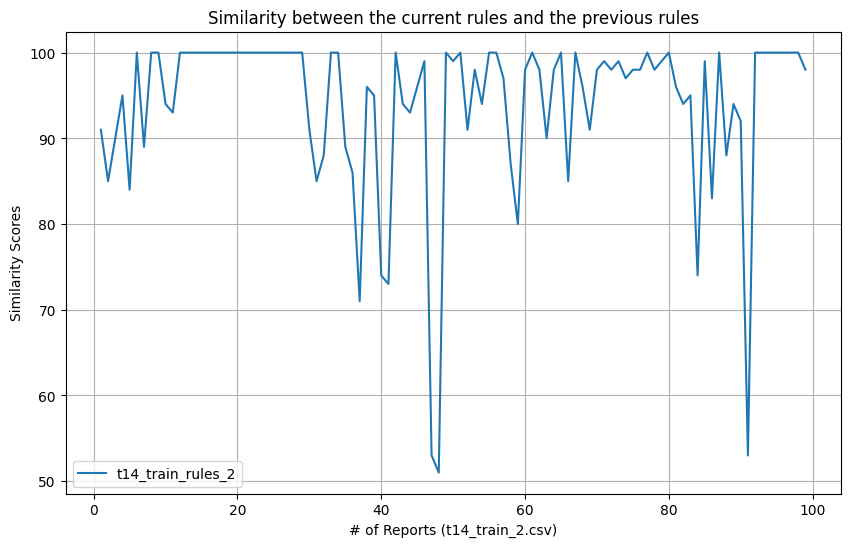

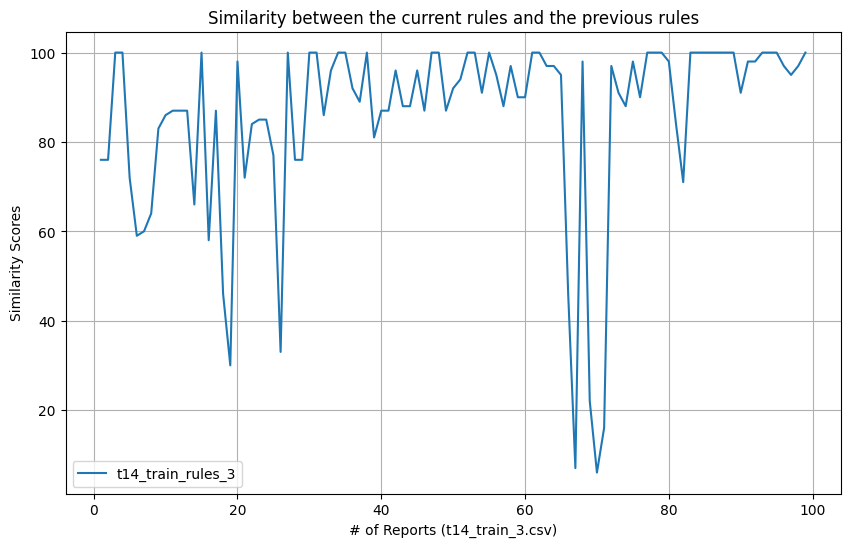

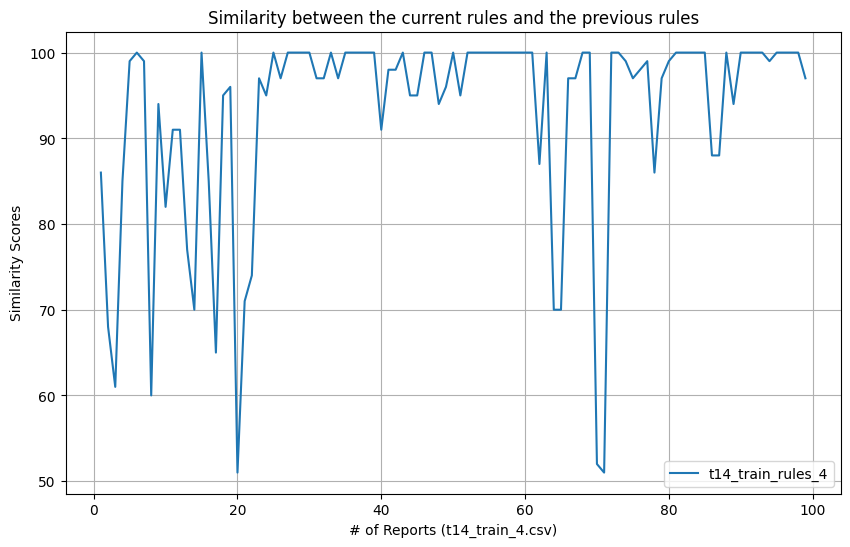

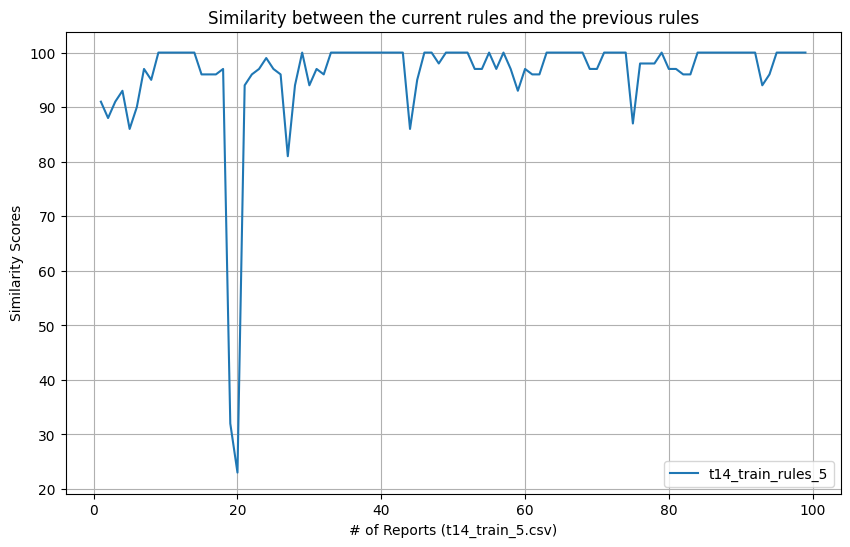

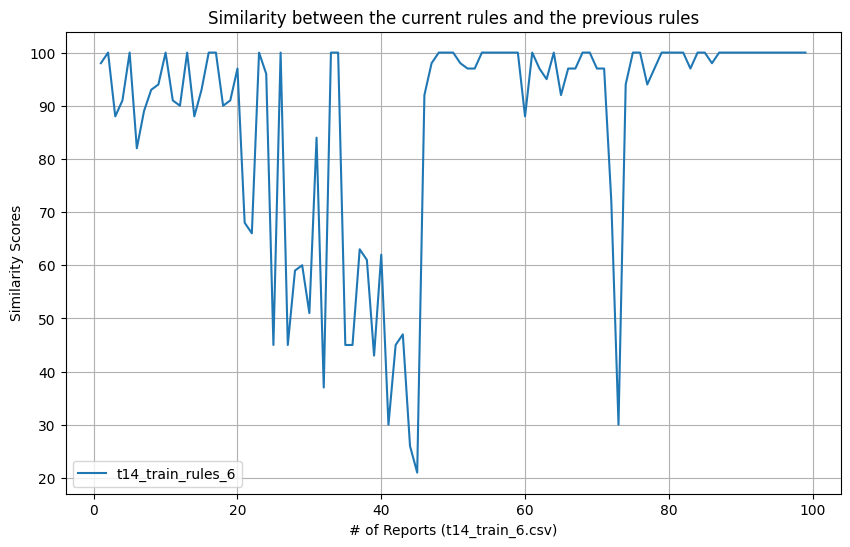

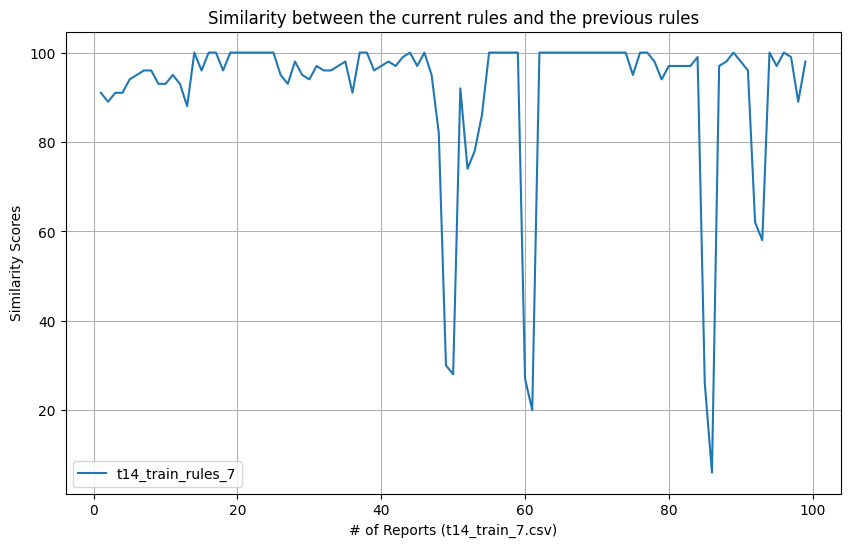

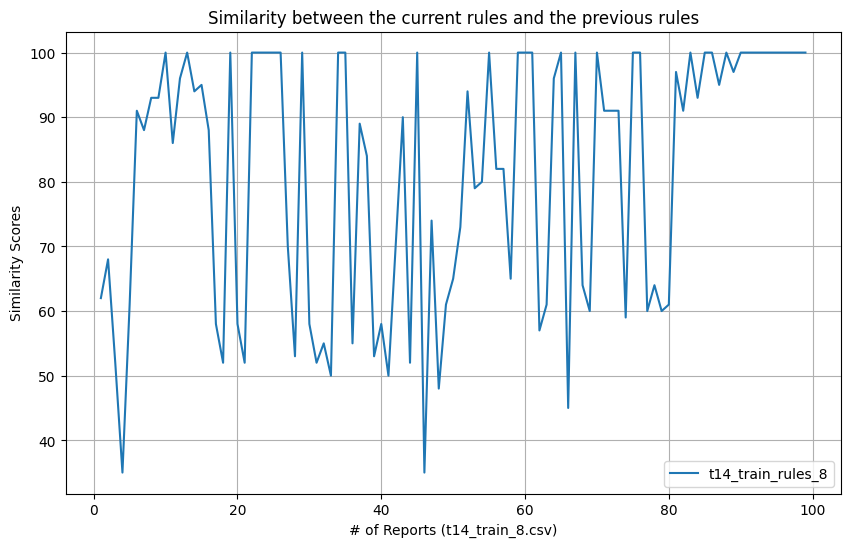

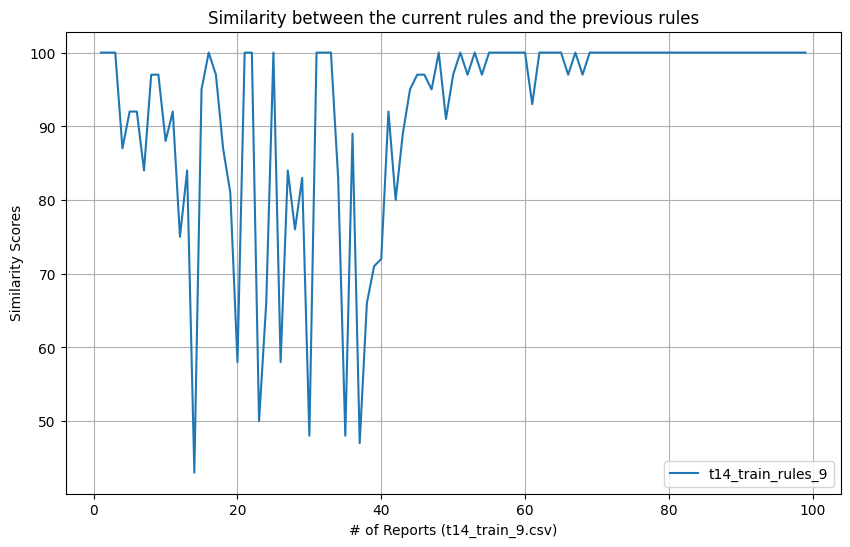

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz

for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    plt.figure(figsize=(10, 6))

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

    plt.xlabel(f'# of Reports (t14_train_{i}.csv)')
    plt.ylabel('Similarity Scores')
    plt.title('Similarity between the current rules and the previous rules')
    plt.legend()
    plt.grid(True)

    plt.show()

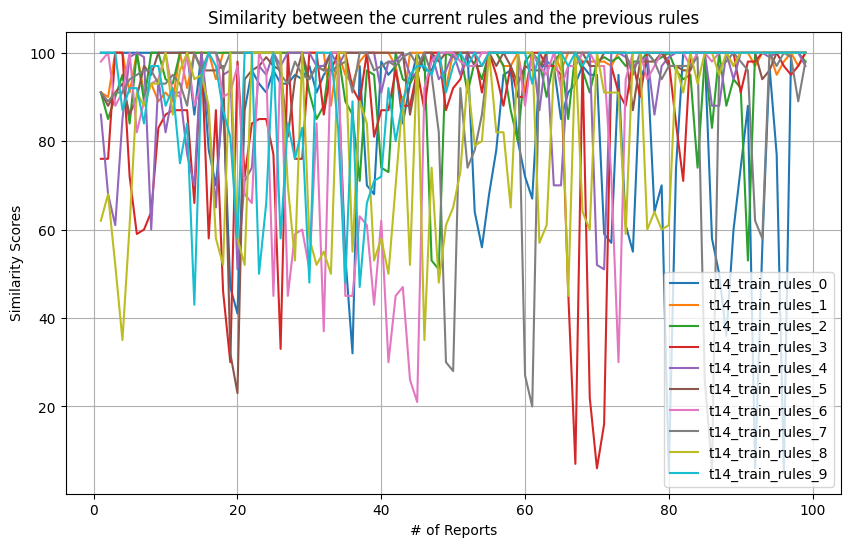

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz


plt.figure(figsize=(10, 6))
for i in range(10):
    memory_df = pd.read_csv(f"/home/yl3427/cylab/selfCorrectionAgent/t14_train_rules_{i}.csv")
    prev_rules = ""
    similarity_scores = []
    for idx, row in memory_df.iterrows():
        if prev_rules == "":
            prev_rules = row['cmem_t_rules_str']
            similarity_scores.append(np.nan)
            continue
        similarity_scores.append(fuzz.ratio(row['cmem_t_rules_str'], prev_rules))
        prev_rules = row['cmem_t_rules_str']

    

    plt.plot(memory_df.index, similarity_scores, label=f"t14_train_rules_{i}")

plt.xlabel(f'# of Reports')
plt.ylabel('Similarity Scores')
plt.title('Similarity between the current rules and the previous rules')
plt.legend()
plt.grid(True)

plt.show()